# 챕터 1. 밴디트 문제

1.1 머신러닝 분류와 강화 학습  
>1.1.1 지도 학습  
1.1.2 비지도 학습  
1.1.3 강화 학습

1.2 밴디트 문제 와 표기법
>1.2.1 밴디트 문제란?  
  환경, 에이전트, 행동, 보상  
>1.2.2 좋은 슬롯머신이란?  
  확률분포표, 기댓값  
>1.2.3 수식으로 표현하기   
보상(Reward) = R  
확률변수 = 값이 확률적으로 결정되는 변수  
행동(Action) = A  
기댓값(Expectaion) = E, $\mathop{\mathbb{E}}$  
보상 R의 기댓값 = $\mathbb{E}\left[ R \right]$   
t번째에 얻는 보상 R의 기댓값 = $\mathbb{E}\left[ R_{t} \right]$  
행동 A로 인한 보상 기댓값 = $\mathbb{E}\left[ R| A \right]$  
보상에 대한 기댓값 = 행동가치 Q, q  
행동 A에 대한 행동가치 $q \left( A \right) = \mathbb{E} \left[ R|A \right]$  
행동가치 Q 를 소문자로 적을 때는 실제 행동가치, 대문자 Q로 적을 때는 추정 행동가치를 의미

    

1.3 밴티드 알고리즘
> 슬롯머신의 가치를 모르고, 추정해나가야 하는 상황.  
> 1.3.1 가치 추정 방법  
표본 평균  
> 1.3.2 평균을 구하는 코드  
증분구현  
> 1.3.3 플레이어의 정책  
탐욕 정책(Greedy policy)  
활용 exploitation  
탐색 exploration  
활용과 탐색의 균형이 강화학습의 핵심. 기본적인 알고리즘은 $\epsilon$-탐욕 정책, 엡실론 그리디 정책  
$\epsilon$-탐욕 정책, 엡실론 그리디 정책 : $\epsilon$ = 0.1  이라면, 10% 확률로 탐색을 하고, 90%는 활용을 한다. 탐색에서는 무작위 행동을 한다. 

1.4 밴디트 알고리즘 구현  
> 1.4.1 슬롯머신 구현

In [1]:
import numpy as np

class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms) # 슬롯머신들의 승률 설정 

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        return 0

    def show(self):
        print(self.rates)

In [2]:
bandit = Bandit()
bandit.show()

[0.14773139 0.95050771 0.77023994 0.92037708 0.78524332 0.81162928
 0.76608057 0.32688161 0.7788968  0.10448553]


In [3]:
_sum = 0
for i in range(3):
    _ = bandit.play(0)
    _sum+=_
    print(_)
# _sum

0
0
0


1.4.2 에이전트 구현

In [4]:
bandit = Bandit()
Q = 0

In [5]:
bandit.show()

[0.89387608 0.04923318 0.14704057 0.38099866 0.59645181 0.54531855
 0.6550546  0.61916816 0.50965399 0.48605146]


In [6]:
for n in range(1, 11):
    reward = bandit.play(0)
    Q += (reward - Q) / n
    print(Q)

0.0
0.5
0.6666666666666666
0.75
0.8
0.8333333333333334
0.8571428571428572
0.875
0.8888888888888888
0.8999999999999999


In [7]:
bandit = Bandit()
Qs = np.zeros(10) # 각 슬롯머신의 가치 추정치
ns = np.zeros(10) # 각 슬롯머신의 플레이 횟수

for n in range(10):
    action = np.random.randint(0, 10) # 임의의 슬롯머신 선택
    reward = bandit.play(action)

    ns[action] += 1 
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]


In [8]:
bandit.show()

[0.9636673  0.41872828 0.08088991 0.35218603 0.29796268 0.16216811
 0.15982737 0.13961457 0.47037314 0.39029777]


In [9]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon # 탐색 확률
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
        self.results = []
        
    def update(self, action, reward):
        self.ns[action]+=1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self): # 행동 추정
        
        if np.random.rand() < self.epsilon: 
            result = np.random.randint(len(self.Qs)) # 탐색 행동. 임의의 기기를 고른다.
        else:
            result = np.argmax(self.Qs) # 탐욕 행동. 가장 큰 인덱스를 반환한다.        
        
        self.results.append(result)
        return result

!git add ch1.ipynb

!git commit -m "1.4.2 agent 구현"

!git push origin main

1.4.3 실행해보기 (44p)

In [10]:
import matplotlib.pyplot as plt

In [11]:
steps = 1000
epsilon = 0.1

In [12]:
bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = [] # 보상 합
rates = []         # 승률
actions = []

In [13]:
for step in range(steps):
    action = agent.get_action()  # ① 행동 선택
    reward = bandit.play(action) # ② 실제로 플레이하고 보상 받음
    agent.update(action, reward) # ③ 행동과 보상을 통한 학습
    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))
    
print(total_reward)    

818


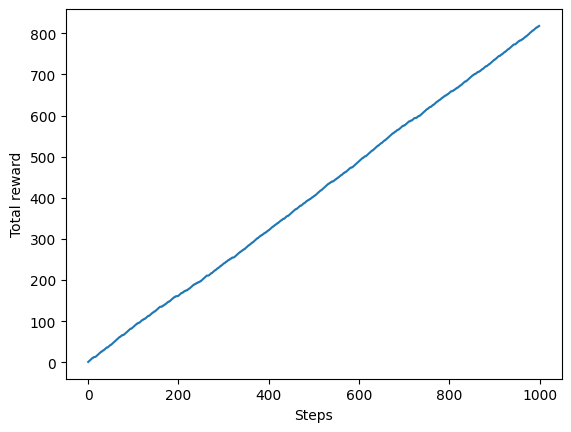

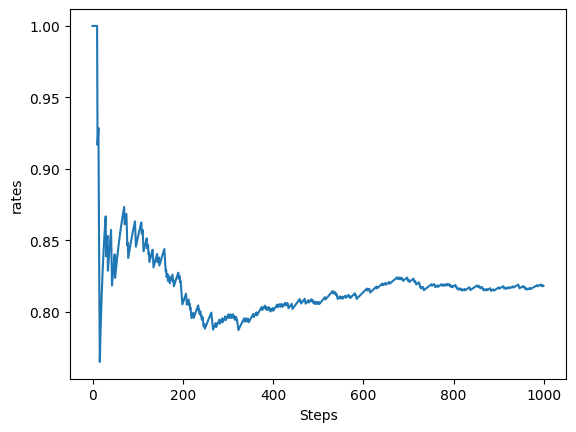

In [14]:
plt.ylabel("Total reward")
plt.xlabel("Steps")
plt.plot(total_rewards)
plt.show()

plt.ylabel("rates")
plt.xlabel("Steps")
plt.plot(rates)
plt.show()

In [15]:
bandit.show()

[0.79754215 0.17302587 0.88656371 0.37929795 0.56653055 0.21447171
 0.79518221 0.64139042 0.85356213 0.78650053]


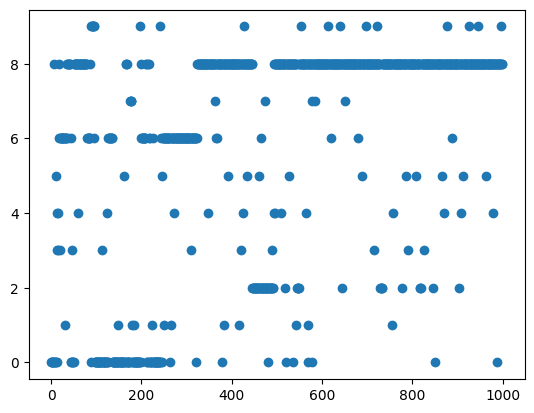

In [16]:
plt.scatter(x = [x for x in range(len(agent.results))], y = agent.results)

In [17]:
import pandas as pd
df = pd.DataFrame(agent.results)
df.value_counts()

0
8    603
0    133
6    125
2     60
9     19
4     15
5     13
1     12
3     11
7      9
Name: count, dtype: int64